In [1]:
 %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

 Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
latestdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(latestdate)

('2017-08-23',)


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
latestdate = dt.datetime.strptime(latestdate[0], '%Y-%m-%d')
yrfromlatest = dt.date(latestdate.year -1, latestdate.month, latestdate.day)
yrfromlatest

datetime.date(2016, 8, 23)

In [12]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

sel = [Measurement.date,Measurement.prcp]
queryresult = session.query(*sel).filter(Measurement.date >= yrfromlatest).all()

precipitation_score = pd.DataFrame(queryresult, columns=['Date','Precipitation'])
precipitation_score = precipitation_score.sort_values(["Date"], ascending=True)
precipitation_score = precipitation_score.set_index("Date")
precipitation_score

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


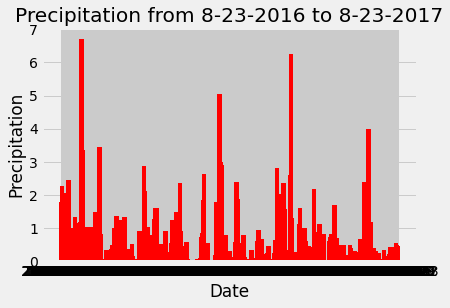

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
x = precipitation_score.index.tolist()
y = precipitation_score['Precipitation'].tolist()

plt.bar(x,y,width = 5 ,color='red', align="center")
plt.title("Precipitation from 8-23-2016 to 8-23-2017")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show()

In [14]:
 # Use Pandas to calcualte the summary statistics for the precipitation data
    
precipitation_score.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


 Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()

9

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

observations = session.query(Measurement.station, func.count(Measurement.tobs))\
.group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc())

for station in observations:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [17]:
# Using the most active station id from the previous query, calculate the lowest, 
#highest, and average temperature.

topstation = observations[0][0]
print(topstation)
stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == topstation)
                      
stats_list=list(stats)
print(stats_list)


USC00519281
[(54.0, 85.0, 71.66378066378067)]


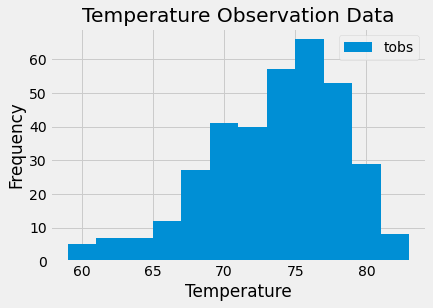

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs = session.query(Measurement.tobs)\
.filter(Measurement.date >= yrfromlatest)\
.filter(Measurement.date <= latestdate)\
.filter(Measurement.station == topstation)\

tobs_list = []
for tob in tobs:
    tobs_list.append(tob[0])
    
fig = plt.figure()
plt.hist(tobs_list, bins=12 , label='tobs')
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.legend(["tobs"], loc = "upper right")
plt.title("Temperature Observation Data")
plt.show()



In [19]:
# Close Session
session.close()